# Проект по анализу бизнес-показателей приложения Procrastinate Pro+

В данном проекте мы проводим аналитику развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Нам нужно разобраться в причинах этой ситуации.

У нас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Нам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

**Цели исследования:**

- выяснить причины неэффективности привлечения пользователей
- сформировать рекомендации для отдела маркетинга с целью повышения эффективности.

**Ход исследования**

Загрузим данные о визитах, заказах и расходах в переменные. Оптимизируем данные для анализа. Убедимся, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv
 -   /datasets/orders_info_short.csv
 -   /datasets/costs_info_short.csv
 
В дальнейшем проведем исследовательский анализ данных, оценим окупаемость рекламы для привлечения пользователей и, в конце проекта, напишем общие выводы по проведенному анализу. 

##  Обзор данных и их подготовка к анализу

Импортируем нужные библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

Загрузим нужные нам данные и сразу переведем колонки с датой в нужный нам формат в каждом датасете:

In [2]:
# журнал с информацией о посещениях сайта
visits = pd.read_csv('/datasets/visits_info_short.csv', 
                     parse_dates=['Session Start', 'Session End']) 

# данные о покупках
orders = pd.read_csv('/datasets/orders_info_short.csv', parse_dates=['Event Dt']) 

# данные о тратах на рекламу
costs = pd.read_csv('/datasets/costs_info_short.csv', parse_dates=['dt'])

Описание данных:

**Структура `visits_info_short.csv`**
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

**Структура `orders_info_short.csv`**
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

**Структура `costs_info_short.csv`**
- Channel — идентификатор рекламного источника,
- Dt — дата проведения рекламной кампании,
- Costs — расходы на эту кампанию.

Посмотрим общую информацию по каждому датасету:

In [3]:
# создадим функцию для удобства просмотра общей информации по каждому датафрейму
def df_info(df):    
    df.info()
    display(df.head())
    print('Количество дубликатов:', df.duplicated().sum())
    display('Количество пропусков',
          df.isna().sum())

In [4]:
df_info(visits)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User Id        309901 non-null  int64         
 1   Region         309901 non-null  object        
 2   Device         309901 non-null  object        
 3   Channel        309901 non-null  object        
 4   Session Start  309901 non-null  datetime64[ns]
 5   Session End    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Количество дубликатов: 0


'Количество пропусков'

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [5]:
df_info(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   User Id   40212 non-null  int64         
 1   Event Dt  40212 non-null  datetime64[ns]
 2   Revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Количество дубликатов: 0


'Количество пропусков'

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [6]:
df_info(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   Channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Количество дубликатов: 0


'Количество пропусков'

dt         0
Channel    0
costs      0
dtype: int64

Формат даты изменен на правильный в каждой таблице. Видим, что каждый столбец соответствует своему формату. Пропусков и дубликатов в данных таблицах нет, но для удобства работы нужно привести названия колонок к эстетичному виду. Избавимся от верхнего регистра и от пробелов.

In [7]:
# создадим список из датафреймов
list_df = [visits, orders, costs] 

In [8]:
# с помощью цикла и методов lower и replace, приведем названия столбцов к рабочему виду
for df in list_df: 
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(" ", "_")
    

Проверим изменения названий столбцов:

In [9]:
for df in list_df:
    display(df.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Index(['dt', 'channel', 'costs'], dtype='object')

Проверим данные на выбросы там, где они могут быть. 

In [10]:
# сумма покупки
orders['revenue'].describe().round(2).to_frame().T

,count,mean,std,min,25%,50%,75%,max
revenue,40212.0,5.37,3.45,4.99,4.99,4.99,4.99,49.99


Видим что минимальная сумма покупки составляет 4.99, а максимальная - 49.99. Глядя на квантили, можем сказать, что не менее 75% составляет цена 4.99, можно предположить, что это месячная стоимость на одну из подписок в приложении.

In [11]:
# сумма трат на рекламу
costs['costs'].describe().round(2).to_frame().T 

,count,mean,std,min,25%,50%,75%,max
costs,1800.0,58.61,107.74,0.8,6.5,12.29,33.6,630.0


Видим, что среднее и медиана достаточно сильно разнятся. Можем логично предполагать, что на какую-то рекламу уходит гораздо больше средств. Об этом же нам говорят минимальное(0.80) и максимальное(630) значения. 

Посмотрим из каких регионов и какими устройствами пользуются клиенты.

In [12]:
visits['region'].value_counts().to_frame()

,region
United States,207327
UK,36419
France,35396
Germany,30759


Всего у нас рассматривается 4 региона пользователей - США, Великобритания, Франция и Германия. Видим, что большинство пользователей из штатов (в исследовательском анализе предоставим круговые диаграммы с долями).

In [13]:
visits['device'].value_counts().to_frame()

,device
iPhone,112603
Android,72590
PC,62686
Mac,62022


Пользуются приложением с 4-х устройств - IPhone, Android, PC и Mac. Большинство пользователей используют IPhone (в исследовательском анализе предоставим круговые диаграммы с долями)

Сделали первичный обзор данных. Данные готовы к дальнейшему анализу. 

## Создание функций для расчета и анализа LTV, ROI, удержания и конверсии
    

Соберём функции для создания профилей, расчёта удержания, конверсии, LTV и ROI.

In [14]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):
    # Шаг 1. Передадим в функцию расчета профиля данные о рекламных затратах (фрейм ad_costs)
    
    # сортируем сессии по id пользователя и дате для того,чтобы работал first
    # находим первые значения для параметров пользователя - будем считать их основными 
    profiles = (sessions.sort_values(by = ['user_id', 'session_start'])           
                        .groupby('user_id').agg({'session_start' : 'first',       
                                                 'channel': 'first',
                                                 'device': 'first',
                                                 'region': 'first'})                                 
                        .rename(columns = {'session_start' : 'first_ts'})  
                        .reset_index()  # вернем все данные из индекса в колонки                                           
               )
    # определим дату первого посещеня 
    # и начало месяца первого посещения - они понадобятся нам при когортном анализе
    profiles['dt'] = profiles['first_ts'].dt.date                                 
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')     
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())   
            
    # Шаг 2. К данным о рекламных затратах добавим количества привлеченных пользователей
    new_users = profiles.groupby(['dt', 'channel']).agg({'user_id': 'nunique'}).rename(
        columns = {'user_id': 'unique_users'}).reset_index()
    new_users['dt'] = pd.to_datetime(new_users['dt'])
    ad_costs = ad_costs.merge(new_users, on = ['dt', 'channel'], how = 'left')
    
    # Шаг 3. Найдем среднюю стоимость привлечения пользователя
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # Шаг 4. Присоединим данные к профилям пользователей информацию о средней стоимости привлечения в день привлечения пользователя из нужного источника
    profiles['dt'] = pd.to_datetime(profiles['dt'])
    profiles = profiles.merge(ad_costs[['dt', 'channel', 'acquisition_cost']], on = ['dt', 'channel'], how = 'left')
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0) # органические пользователи будут стоить 0
    
    return profiles

In [15]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [16]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [17]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Так же напишем функции для визуализации метрик, которые мы обозначили выше:

In [18]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [19]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [20]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [21]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

### Создание пользовательских профилей

Создадим пользовательские профили. Определим минимальную и максимальную даты привлечения пользователей.

In [22]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [23]:
min_date_att = profiles['dt'].min() 
max_date_att = profiles['dt'].max() 

# применим метод strftime для возвращения строки и эстетичного вывода
display(min_date_att.strftime("Минимальная дата привлечения пользователей - %Y-%m-%d"),  
        max_date_att.strftime("Максимальная дата привлечения пользователей - %Y-%m-%d")) 

'Минимальная дата привлечения пользователей - 2019-05-01'

'Максимальная дата привлечения пользователей - 2019-10-27'

Видим, что минимальная и максимальная дата определены верно, как и указано в описании задания, что взяты данные о пользователях, привлеченных с 1 мая по 27 октября 2019 года. В нашем исследовании мы принимаем за горизонт анализа 2 недели, а за точку наблюдения - 1 ноября.

In [24]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

### Определение долей пользователей из разных стран

Построим таблицу, отражающую количество пользователей и их долю из каждой страны.

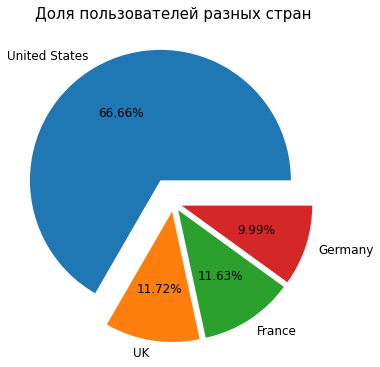

,users_count,users_share
region,,
United States,100002,66.66
UK,17575,11.72
France,17450,11.63
Germany,14981,9.99


In [25]:
region_share = pd.DataFrame()
# кол-во пользователей из каждого региона
region_share['users_count'] = profiles.groupby('region')['user_id'].count() 
# доля пользователей каждого региона
region_share['users_share'] = round((region_share['users_count'] / profiles['region'].count()) * 100, 2) 
                                                                                               

# построим круговую диаграмму, отбражающую долю пользователей в разных странах
region_share['users_share'].sort_values(ascending=False).plot.pie(radius=1.5,   
                                                             autopct='%1.2f%%', 
                                                             fontsize=12,
                                                             explode=(0.3, 0.1,0.1,0.1))
plt.title('Доля пользователей разных стран' + '\n'*4, size=15)
plt.ylabel(None)
plt.show()

# выведем таблицу по заданию
display(region_share.sort_values(by='users_share', ascending=False)) 

Ознакомившись с таблицей и диаграммой, видим, что самая большая доля пользователей - это пользователи из США (66,66 %). Примерно одинаковое количество пользователей из Великобритании (11,72%) и Франции (11,63%). Меньше всего пользователей приложения приходится на Германию (9,99%).

Далее посмотрим на платящих пользователей и долю платящих из каждой страны.

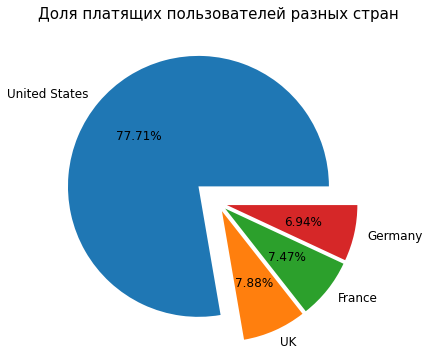

,users_count,users_share,payers_share_of_total
region,,,
United States,6902,77.72,6.90
Germany,616,6.94,4.11
UK,700,7.88,3.98
France,663,7.47,3.80


In [26]:
region_payer_share = pd.DataFrame()
# кол-во платящих пользователей из каждого региона
region_payer_share['users_count'] = profiles.query('payer == True').groupby('region')['user_id'].count() 
# доля платящих пользователей каждого региона
region_payer_share['users_share'] = round((region_payer_share['users_count'] / 
                                           profiles.query('payer == True')['region'].count()) * 100, 2)
# доля платящих пользователей из разных стран относительно общего количества
region_payer_share['payers_share_of_total'] = round(region_payer_share['users_count'] / region_share['users_count'] * 100, 2)

# построим круговую диаграмму, отбражающую долю платящих пользователей в разных странах
region_payer_share['users_share'].sort_values(ascending=False).plot.pie(radius=1.5,  
                                                             autopct='%1.2f%%',
                                                             fontsize=12,
                                                             explode=(0.3, 0.1,0.1,0.1))
plt.title('Доля платящих пользователей разных стран' + '\n'*4, size=15)
plt.ylabel(None)
plt.show()

display(region_payer_share.sort_values(by='payers_share_of_total', ascending=False)) # выведем таблицу по заданию

По созданным диаграмме и таблице, можем сказать, что платящие пользователи из США лидируют (77,71%) из всех платящих клиентов. Доли платящих из Великобритании(7,88%) и Франции(7,47%) примерно равны. Меньше всего платящих пользователей из Германии (6,94%).

Но если мы посмотри долю платящих пользователей от общего количества клиентов в каждой стране, то увидим, что США так же остается на первом месте (6,9%), а Германия уже на втором месте (4,11%). Великобритания(3,98%) и Франция(3,80%) примерно на одном уровне. 

### Определение долей по устройствам пользователей

Далее построим таблицу и диаграмму, отражающую количество и долю устройств, с которых пользователи "сидят" в приложении.

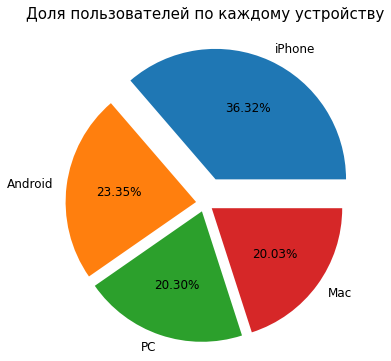

,users_count,device_share
device,,
iPhone,54479,36.32
Android,35032,23.35
PC,30455,20.30
Mac,30042,20.03


In [27]:
device_share = pd.DataFrame()
# кол-во пользователей с разных устройств
device_share['users_count'] = profiles.groupby('device')['user_id'].count()
# доля пользователей по каждому устройству
device_share['device_share'] = round(device_share['users_count'] / profiles['device'].count() * 100, 2)

device_share['device_share'].sort_values(ascending=False).plot.pie(radius=1.5,  
                                                             autopct='%1.2f%%',
                                                             fontsize=12,
                                                             explode=(0.3, 0.1,0.1,0.1))
plt.title('Доля пользователей по каждому устройству' + '\n'*4, size=15)
plt.ylabel(None)
plt.show()


display(device_share.sort_values(by='device_share', ascending=False))

Изучив таблицу и диаграмму, можем сделать вывод, что пользователи предпочитают использовать приложение с мобильный устройств, большую долю из которых занимает IPhone(36,32%). На втором месте находится Android(23,35%). И уже за ними следом идут примерно в равном соотношении PC(20,30%) и Mac(20,03%).

Построим такое же распределение по платящим пользователям.

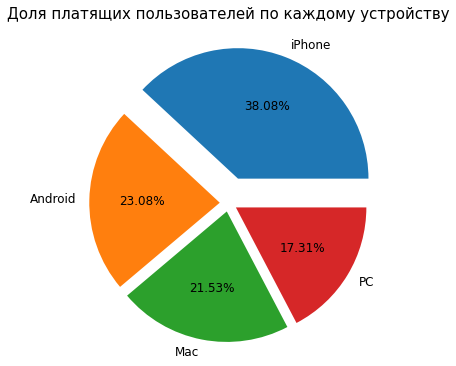

,users_count,device_share,device_share_of_total
device,,,
Mac,1912,21.53,6.36
iPhone,3382,38.08,6.21
Android,2050,23.08,5.85
PC,1537,17.31,5.05


In [28]:
device_payer_share = pd.DataFrame()
# кол-во платящих пользователей с разных устройств
device_payer_share['users_count'] = profiles.query('payer == True').groupby('device')['user_id'].count()
# доля платящих пользователей по каждому устройству
device_payer_share['device_share'] = round(device_payer_share['users_count'] / profiles.query(
    'payer == True')['device'].count() * 100,2)
# доля платящих пользователей относительно общего количества каждого устройства
device_payer_share['device_share_of_total'] = round(device_payer_share['users_count'] / device_share['users_count'] * 100, 2)

device_payer_share['device_share'].sort_values(ascending=False).plot.pie(radius=1.5,  
                                                             autopct='%1.2f%%',
                                                             fontsize=12,
                                                             explode=(0.3, 0.1,0.1,0.1))
plt.title('Доля платящих пользователей по каждому устройству' + '\n'*4, size=15)
plt.ylabel(None)
plt.show()


display(device_payer_share.sort_values(by='device_share_of_total', ascending=False))

Ситуация для платящих пользователей повторяет общую картину (только MAC и PC поменялись местами). Основная доля платящих пользователей - это владельцы IPhone (38,08%). Далее идут владельцы Android (23,08%), Mac(21,53%) и PC(17,31%).

Если смотреть долю платящих пользователей из общего количества каждого устройства, то в данном случае будет лидировать Mac(6,36%), вторую строчку занимает IPhone(6,21%), третью строчку занимает Android(5,85%) и последнее место занимает PC(5,05%).

### Определение рекламных источников привлечения

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей.

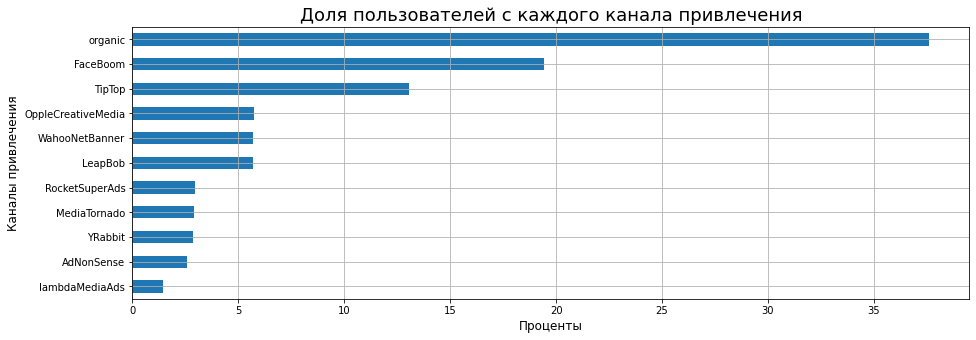

,users_count,channel_share
channel,,
organic,56439,37.62
FaceBoom,29144,19.43
TipTop,19561,13.04
OppleCreativeMedia,8605,5.74
LeapBob,8553,5.70
WahooNetBanner,8553,5.70
RocketSuperAds,4448,2.97
MediaTornado,4364,2.91
YRabbit,4312,2.87


In [29]:
channel_share = pd.DataFrame()
# кол-во пользователей из разных каналов
channel_share['users_count'] = profiles.groupby('channel')['user_id'].count()
# доля пользователей с каждого канала
channel_share['channel_share'] = round(channel_share['users_count'] / profiles['channel'].count() * 100, 2)

# в данном случае визуализируем с помощью баров, так как каналов больше 10 шт., а откинуть каналы с маленькой долей 
# мы не можем, так как доля платящих пользователей, теоретически, в маленьких каналах может быть больше в дальнейшем.
channel_share['channel_share'].sort_values().plot.barh(figsize=(15,5), 
                                                       grid=True)
plt.title('Доля пользователей с каждого канала привлечения', size=18)
plt.xlabel('Проценты', size=12)
plt.ylabel('Каналы привлечения', size=12)
plt.show()

display(channel_share.sort_values(by='channel_share', ascending=False))

Изучив таблицу, можем заметить, что больше всего пользователей приходится на органический траффик (37,62%). Далее по числу пользователей идут источники FaceBoom (19,43%) и TipTop(13,04%). Остальные каналы принесли менее 6% пользователей.

Давайте посмотрим, такая ли же картина для пользователей платящего сегмента.

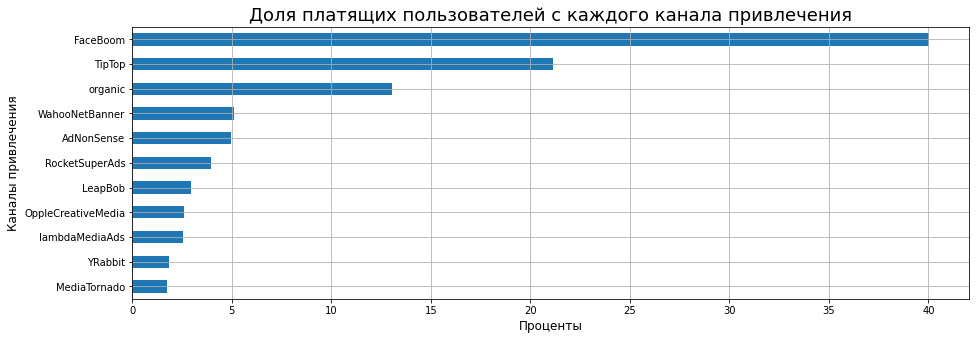

,users_count,channel_share,channel_share_of_total
channel,,,
FaceBoom,3557,40.05,12.20
AdNonSense,440,4.95,11.34
lambdaMediaAds,225,2.53,10.47
TipTop,1878,21.15,9.60
RocketSuperAds,352,3.96,7.91
WahooNetBanner,453,5.10,5.30
YRabbit,165,1.86,3.83
MediaTornado,156,1.76,3.57
LeapBob,262,2.95,3.06


In [30]:
channel_payer_share = pd.DataFrame()
# кол-во платящих пользователей из разных каналов
channel_payer_share['users_count'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
# доля платящих пользователей с каждого канала
channel_payer_share['channel_share'] = round(channel_payer_share['users_count'] / 
                                             profiles.query('payer == True')['channel'].count() * 100, 2)
# доля платящих пользователей относительно общего количества с каждого канала
channel_payer_share['channel_share_of_total'] = round(channel_payer_share['users_count'] / 
                                                      channel_share['users_count'] * 100, 2)

# так же визуализируем с помощью баров, так как каналов больше 10 шт., а откинуть каналы с маленькой долей 
# мы не можем, так как доля платящих пользователей от общего кол-ва с каждого канала, теоретически, 
# в маленьких каналах может быть больше, что мы и видим по итогу в таблице.
channel_payer_share['channel_share'].sort_values().plot.barh(figsize=(15,5), 
                                                       grid=True)
plt.title('Доля платящих пользователей с каждого канала привлечения', size=18)
plt.xlabel('Проценты', size=12)
plt.ylabel('Каналы привлечения', size=12)
plt.show()

display(channel_payer_share.sort_values(by='channel_share_of_total', ascending=False))

Для платящего сегмента пользователей картина несколько иная. Большинство платящих пользователей пришли через канал FaceBoom (40,05%),из TipTop(21,15%) и только 13,06% из органического трафика. Все остальные каналы принесли менее 5% платящих пользователей.

При этом, если смотреть долю платящих пользователей от общего числа из разных каналов, то первую тройку занимают: FaceBoom (12,20%), AdNonSense(11,34%) и lambdaMediaAds(10,47%). 

### Выводы

Сформировав таблицы, графики и изучив информацию, можем обозначить следующие выводы:

- Минимальная и максимальная дата определены верно, как и указано в описании задания, что взяты данные о пользователях, привлеченных с 1 мая по 27 октября 2019 года.
<br>

- Самая большая доля пользователей - это пользователи из США (66,66 %). Примерно одинаковое количество пользователей из Великобритании (11,72%) и Франции (11,63%). Меньше всего пользователей приложения приходится на Германию (9,99%). 
<br>

- Платящие пользователи из США  так же лидируют (77,71%) из всех платящих клиентов. Доли платящих из Великобритании(7,88%) и Франции(7,47%) примерно равны. Меньше всего платящих пользователей из Германии (6,94%). Но если мы посмотри долю платящих пользователей от общего количества клиентов в каждой стране, то увидим, что США так же остается на первом месте (6,9%), а Германия уже на втором месте (4,11%). Великобритания(3,98%) и Франция(3,80%) примерно на одном уровне.
<br>

- Пользователи чаще предпочитают использовать приложение с мобильный устройств, большую долю из которых занимает IPhone(36,32%). На втором месте находится Android(23,35%). И уже за ними следом идут примерно в равном соотношении PC(20,30%) и Mac(20,03%).
<br>

- Ситуация для платящих пользователей повторяет общую картину (только MAC и PC поменялись местами). Основная доля платящих пользователей - это владельцы IPhone (38,08%). Далее идут владельцы Android (23,08%), Mac(21,53%) и PC(17,31%). Если смотреть долю платящих пользователей из общего количества каждого устройства, то в данном случае будет лидировать Mac(6,36%), вторую строчку занимает IPhone(6,21%), третью строчку занимает Android(5,85%) и последнее место занимает PC(5,05%).
<br>

- Больше всего пользователей приходится на органический траффик (37,62%). Далее по числу пользователей идут источники FaceBoom (19,43%) и TipTop(13,04%). Остальные каналы принесли менее 6% пользователей. 
<br>

- Для платящего сегмента пользователей картина несколько иная. Большинство платящих пользователей пришли через канал FaceBoom (40,05%),из TipTop(21,15%) и только 13,06% из органического трафика. Все остальные каналы принесли менее 5% платящих пользователей. При этом, если смотреть долю платящих пользователей от общего числа из разных каналов, то первую тройку занимают: FaceBoom (12,20%), AdNonSense(11,34%) и lambdaMediaAds(10,47%).

## Маркетинг

### Сумма расходов на маркетинг

Посчитаем общую сумму расходов на маркетинг:

In [31]:
print('Общая сумма расходов на маркетинг:', costs['costs'].sum().round(2))

Общая сумма расходов на маркетинг: 105497.3


Выясним как траты распределены по источникам:

,costs,channel_costs_share
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


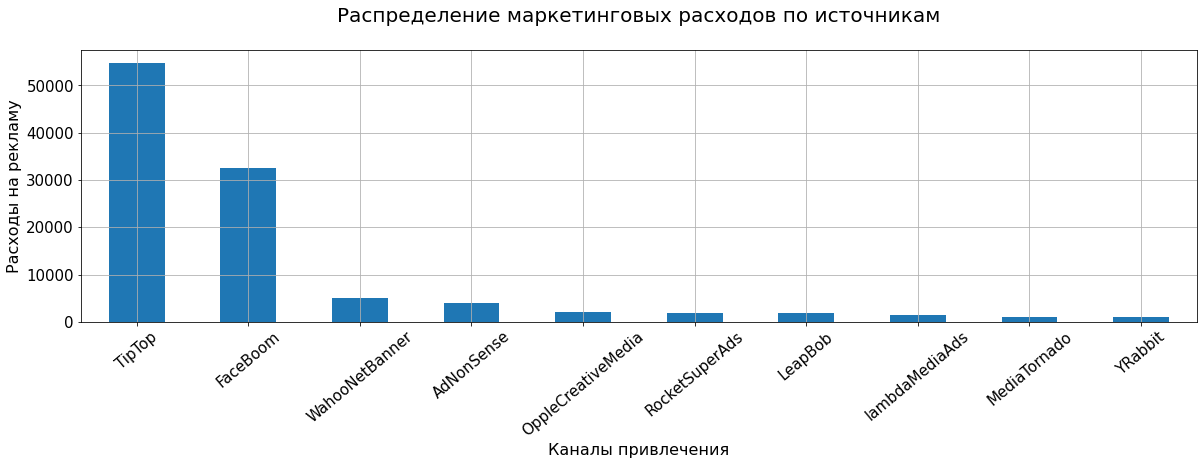

In [32]:
channel_costs = costs.groupby('channel')['costs'].sum().sort_values(ascending=False).to_frame()
channel_costs['channel_costs_share'] = round(costs.groupby('channel')['costs'].sum()/
                                             costs['costs'].sum() * 100, 2)

display(channel_costs)

channel_costs['costs'].sort_values( ascending=False).plot.bar(figsize=(20,5), fontsize=15,
                                                                               rot=40, grid=True)
plt.title('Распределение маркетинговых расходов по источникам'+ '\n', size=20)
plt.xlabel('Каналы привлечения', size=16)
plt.ylabel('Расходы на рекламу', size=16)
plt.show()

Можем заметить, что с большим отрывом самые дорогие траты на рекламу приходятся на источники - TipTop (51,9%) и FaceBoom (30,75%). На остальные рекламные источники тратятся гораздо меньшие суммы.

Построим график изменения расходов во времени:

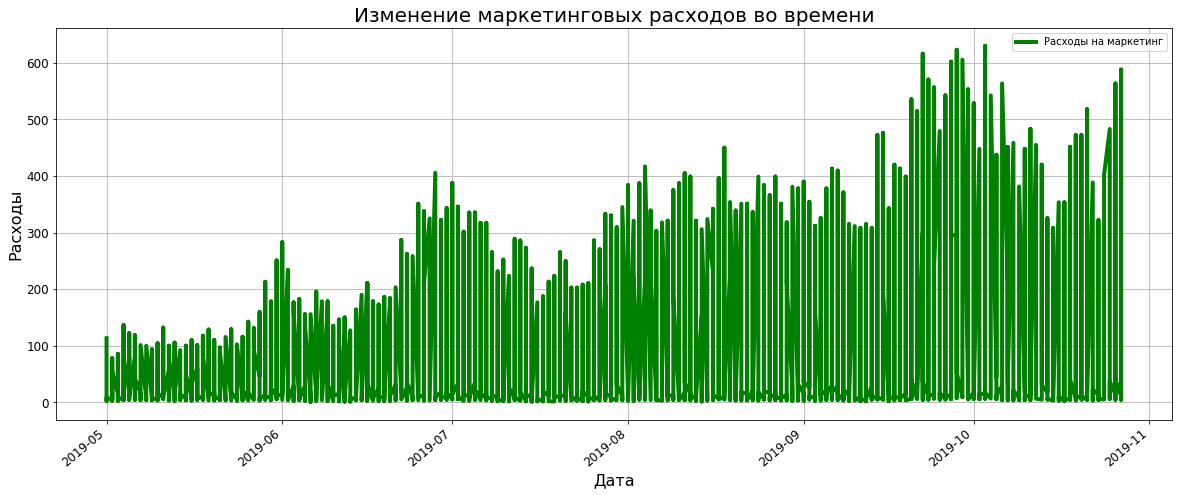

In [33]:
costs.plot.line(y='costs',
           x='dt',
           figsize=(20, 8),
           fontsize=12,
           grid=True, 
           rot=40,        
           label='Расходы на маркетинг',                       
           legend=True,
           color='Green', linewidth=4) 

plt.title('Изменение маркетинговых расходов во времени', size=20)
plt.xlabel('Дата', size=16)
plt.ylabel('Расходы', size=16)
plt.show()

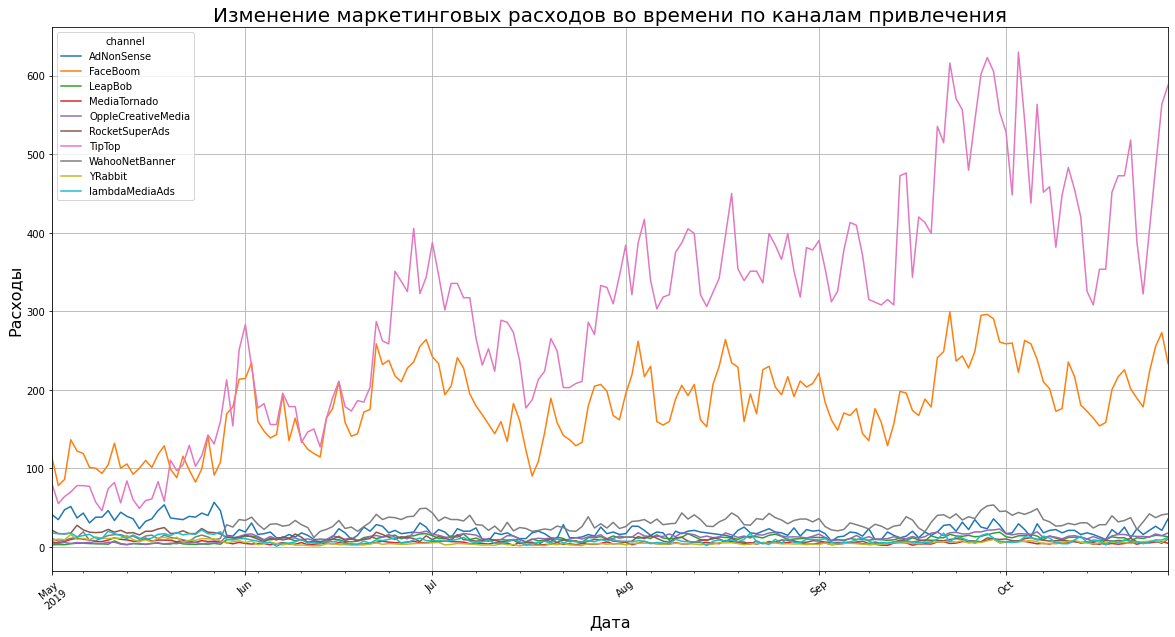

In [34]:
costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='mean'
    ).plot(                                             
           figsize=(20, 10), 
           grid=True, 
           rot=40,        
           label='Каналы',                      
           legend=True) 

plt.title('Изменение маркетинговых расходов во времени по каналам привлечения', size=20)
plt.xlabel('Дата', size=16)
plt.ylabel('Расходы', size=16)
plt.show()

Видим по графику, что постепенно маркетинговые расходы компании увеличивались. Своего пика они достигли в конце сентября-начеле октября, больше 600. К середине октября данные расходы, временно, фактически уменьшились в два раза, но к концу октября отметка снова приближается к 600.

Видим, что из всех каналов привлечения, дороже всего с каждым месяцем обходится канал TipTop. В конце сентября-начеле октября именно траты на данный источник превысили 600. На втором месте находится канал привлечения FaceBoom, где траты на рекламу не превышали 300, но он так же выделяется из всех остальных. На остальные каналы в основном тратится меньше 50 каждый месяц.

### Расчет САС на одного пользователя

Далее рассчитаем сколько в среднем компания тратит на привлечение одного клиента и визуализируем информацию по `CAC` для каждого источника трафика, кроме органического, по понятным причинам.

In [35]:
print('Cредний `CAC` на одного пользователя:', profiles.query('channel != "organic"').acquisition_cost.mean().round(2))

Cредний `CAC` на одного пользователя: 1.13


Рассчитаем средний CAC на одного пользователя для каждого источника трафика:

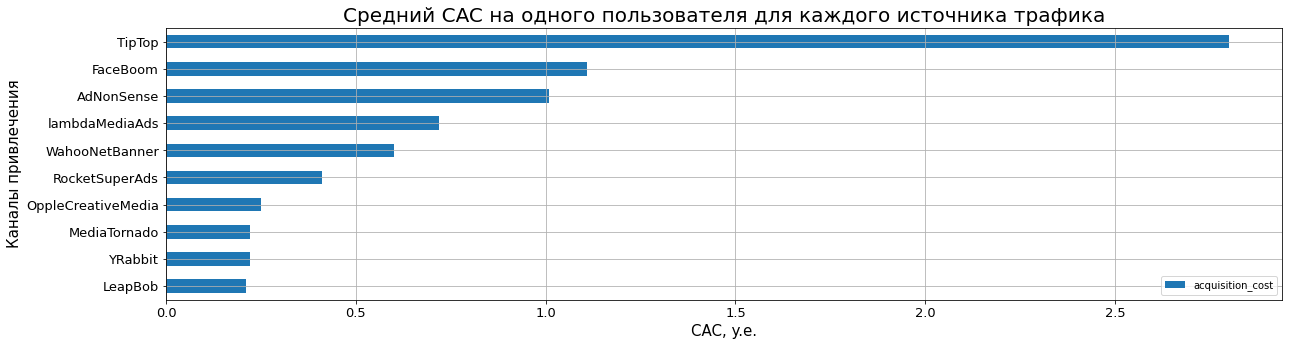

,acquisition_cost
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


In [36]:
cac = profiles.query('channel != "organic"').groupby('channel')['acquisition_cost'].mean().to_frame().sort_values(
    by='acquisition_cost', ascending=False).round(2)

cac.sort_values(by='acquisition_cost').plot.barh(figsize=(20,5), grid=True,
                                                fontsize=13)
plt.title('Cредний CAC на одного пользователя для каждого источника трафика', size=20)
plt.xlabel ('CAC, y.e.', size=15)
plt.ylabel ('Каналы привлечения', size=15)
plt.show()

display(cac)

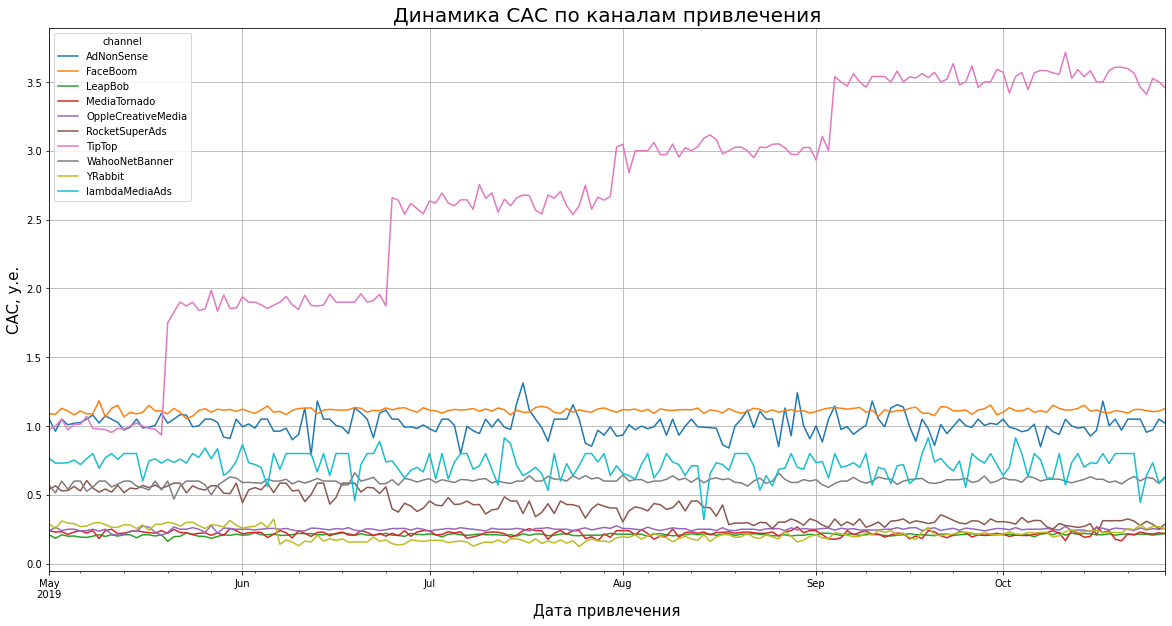

In [37]:
profiles.query('channel != "organic"').pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(20, 10))
plt.ylabel('CAC, у.е.', size=15)
plt.xlabel('Дата привлечения', size=15)
plt.title('Динамика САС по каналам привлечения', size=20)
plt.show()

На привлечения одного клиента компания, в среднем, тратит 1.13. Если смотреть в разбивке по каналам, то сильно выше общего среднего на привлечение одного клиента уходит в канале TipTop (2.80). 

Изучив график динамики `CAC` по каналам привлечения, можем заметить так же сильно выбивающийся канал, где привлечение одного клиента обходится всё дороже с каждым месяцем в нашем временном промежутке. От 1 до 3.5 за пользователя за 5 месяцев дошел `CAC` из канала TipTop. Остальные каналы примерно держатся на одном уровне в данном значении на протяжени всего отрезка. Только в канале RocketSuperAds динамика значения упала с 0.5 до, примерно, 0.25 (в два раза). У остальных среднее держится примерно на одном уровне. 

Из всех графиков выше, видно, что компания искренне верит, что вложения в рекламу из канала TipTop приносит хороший результат, а так это или нет мы узнаем в разделе окупаемости рекламы.

### Выводы

Из проведенного анализа по маркетинга можем сделать следующие промежуточные выводы:

- Общая сумма расходов на маркетинг составляет 105497.3
<br>

- С большим отрывом самые дорогие траты на рекламу приходятся на источники - TipTop (54751.3) и Face Boom (32445.6). На остальные рекламные источники тратятся гораздо меньшие суммы.
<br>

- В целом, постепенно маркетинговые расходы компании увеличивались с мая по октябрь. Своего пика они достигли в конце сентября-начале октября, больше 600. К середине октября данные расходы, временно, фактически уменьшились в два раза, но к концу октября отметка снова приближается к 600.
<br>

- Из всех каналов привлечения, дороже всего с каждым месяцем обходится канал TipTop. В конце сентября-начеле октября именно траты на данный источник превысили 600. На втором месте находится канал привлечения FaceBoom, где траты на рекламу не превышали 300, но он так же выделяется из всех остальных. На остальные каналы в основном тратится меньше 50 каждый месяц.
<br>

- Cредний `CAC` на одного пользователя составляет 1.13
<br>

-  В разбивке по каналам сильно выше общего среднего на привлечение одного клиента уходит в канале TipTop (2.80).
<br>

- Самый динамично увеличивающийся `CAC` из месяца в месяц на одного пользователя приходится на канал привлечения TipTop (от 1 до 3.5 за 5 месяцев). По увеличивающимся показателям трат на рекламу и САС на одного пользователя, видно, что компания искренне верит, что расходы на рекламу в TipTop приносит им результат.

## Оценка окупаемости рекламы для привлечения пользователей

Для оценки стоимости привлечения одного покупателя воспользуемся функцией для подсчета LTV, CAC и ROI, и построим графики.

Органический трафик достается нам бесплатно, поэтому исключим его из анализа.

In [38]:
profiles_no_organic = profiles.query('channel != "organic"')

### Общая окупаемость рекламы

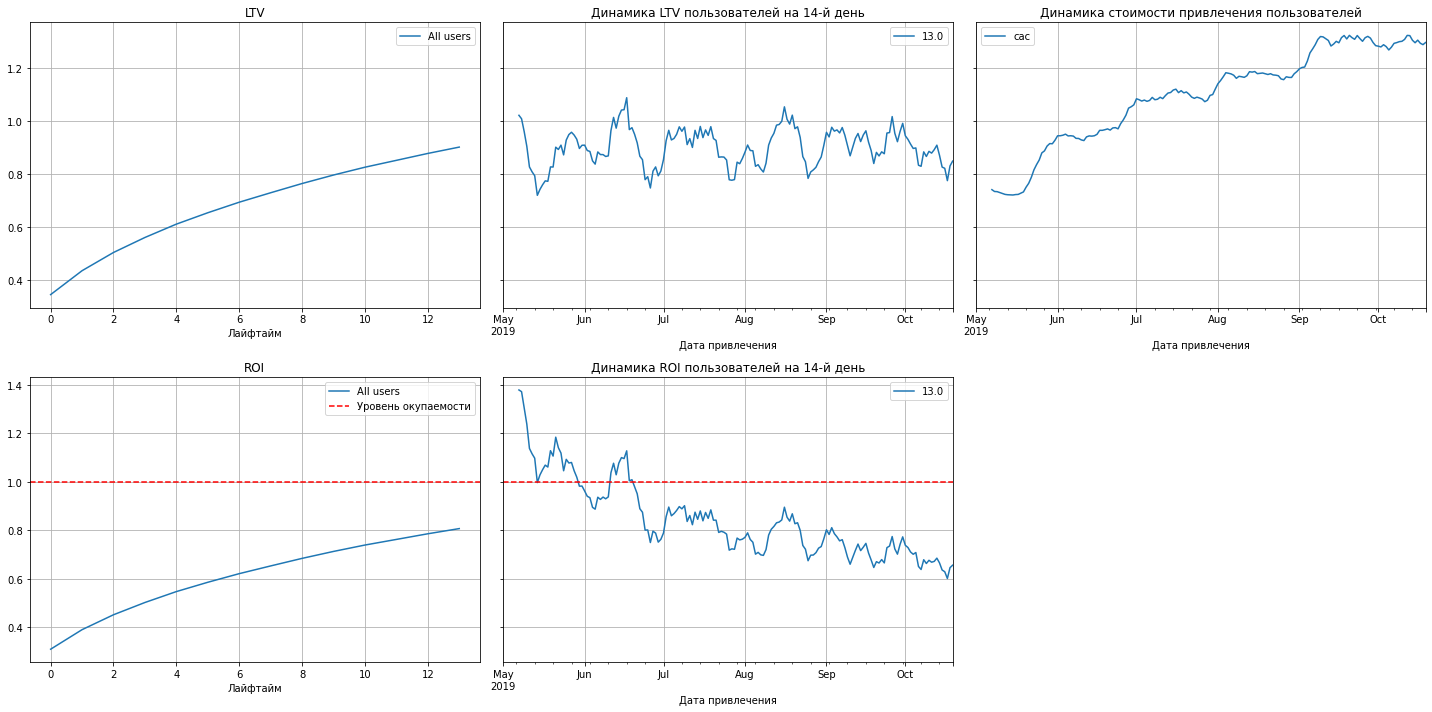

In [39]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_no_organic, orders, observation_date, horizon_days)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можем сделать следующие выводы:

- LTV, в целом, стабилен. В динамике сильно скачет вверх-вниз, но в среднем, уровень одинаков.
<br>

- CAC растет стабильно и постоянно. Компания постоянно увеличивает инвестиции в  маркетинг с каждым месяцем.
<br>

- ROI нам показывает, что инвестиции абсолютно точно не окупаются. Причем, в месячной динамике окупаемости видна зависимость, что чем больше компания вкладывает с каждым месяцем, тем меньше окупаемость инвестиций с каждым месяцем.

### Окупаемость рекламы с разбивкой по рекламным каналам

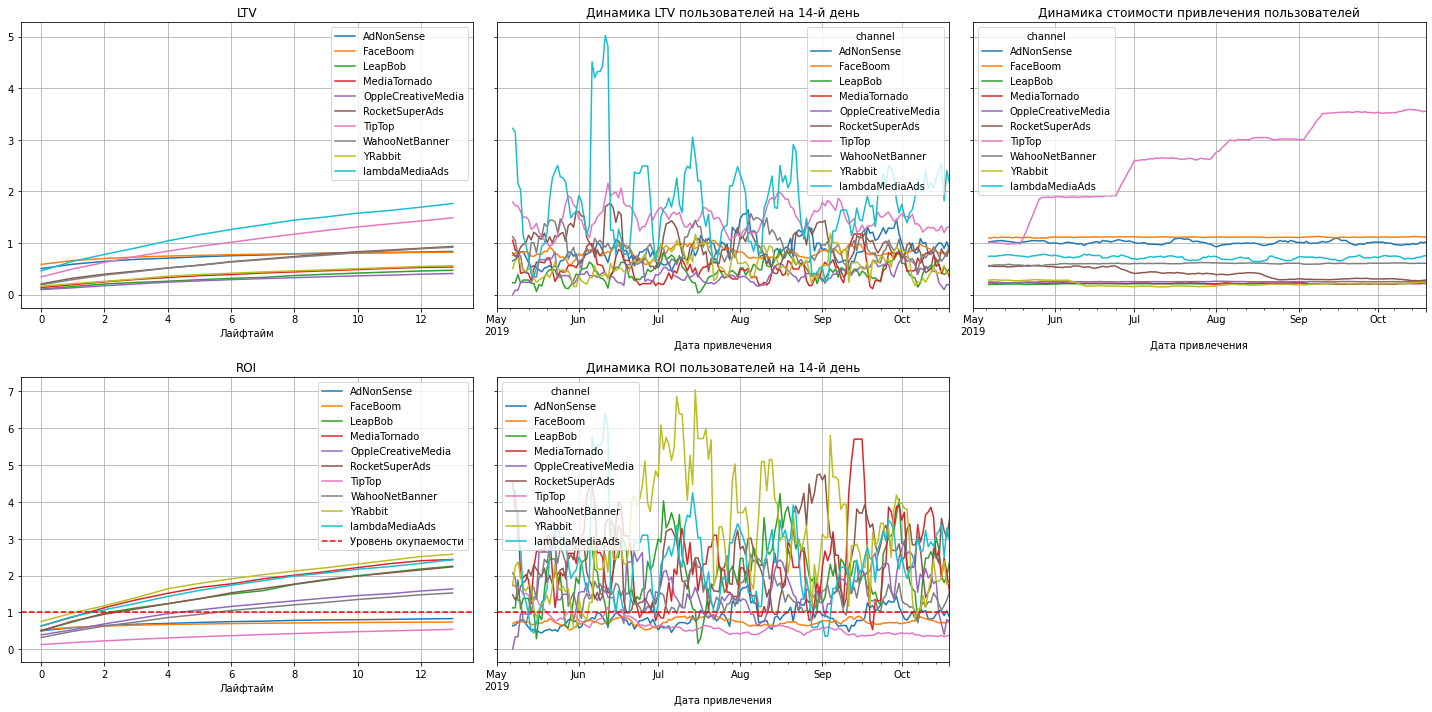

In [40]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_organic, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
)

Делаем следующие выводы по графикам:

- LTV более менее стабилен везде
<br>

- САС, как мы уже анализировали выше, с каждым месяцем растет только в одном канале - TipTop, в других - он достаточно стабилен. Упал в 2 раза только на канале RocketSuperAds.
<br>

- ROI показывает, что на 6-й день все инвестиции в каналы окупаются, кроме TipTop, FaceBoom и AdNonSense. Напомним, что эти каналы обходятся компании дороже остальных.

### Окупаемость рекламы с разбивкой по  странам

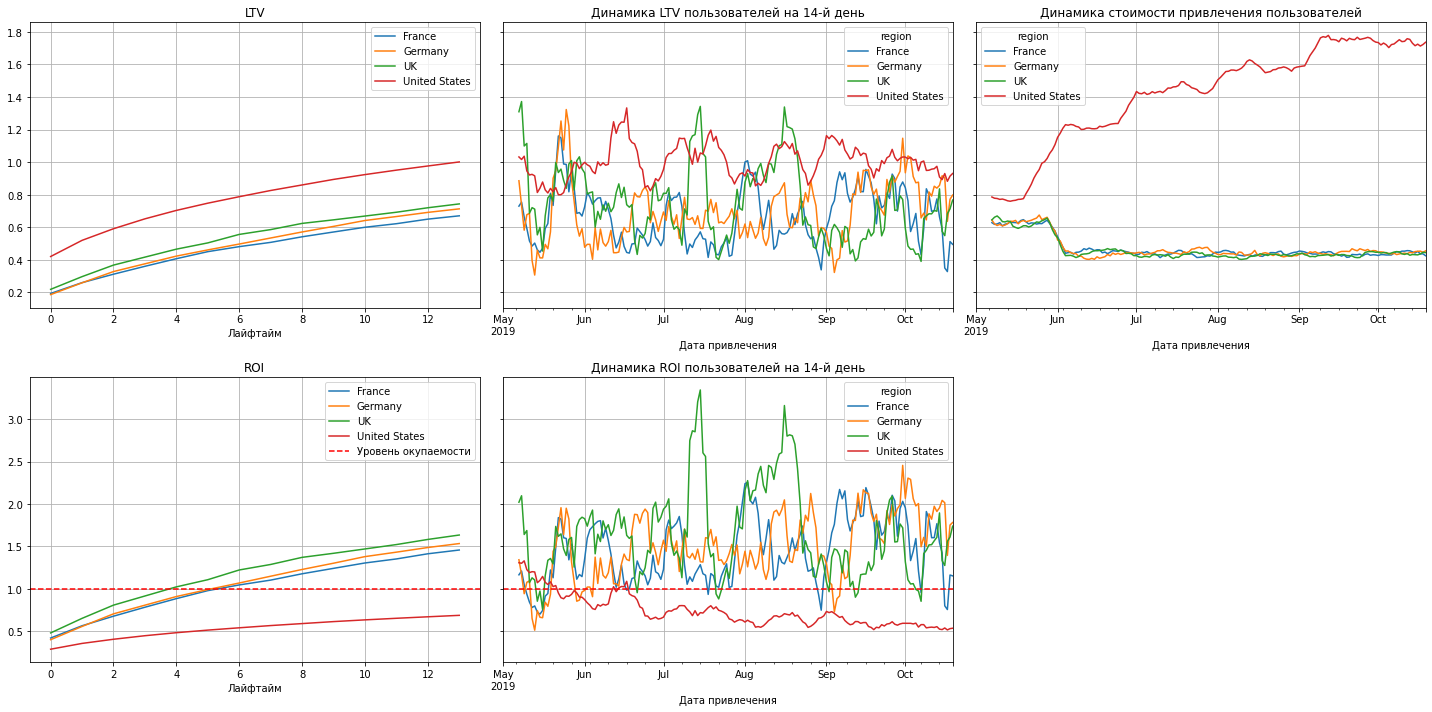

In [41]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_organic, orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
)

Делаем следующие выводы по графикам:

- LTV более менее стабилен везде
<br>

- САС стабильно растет в США из месяца в месяц, в Европе же, наоборот, САС к июню падает и держится на одном уровне на всем промежутке времени
<br>

- ROI показывает, что на 5-й день все европейские страны выходят на уровень окупаемости инвестиций, а вот США, к сожалению, не окупает достаточно большие вложения.

### Окупаемость рекламы с разбивкой по  устройствам

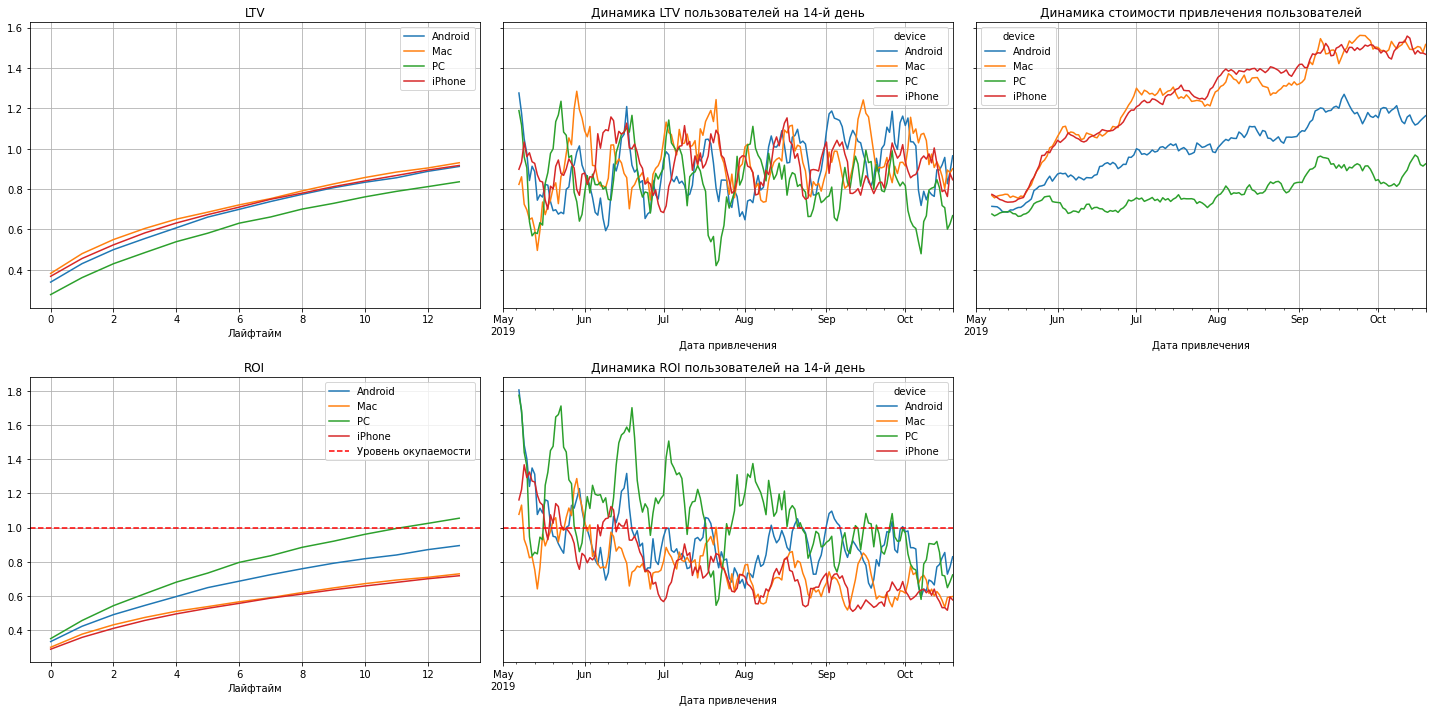

In [42]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_organic, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
)

Делаем следующие выводы по графикам:

- LTV так же стабилен везде
<br>

- САС, как мы мы видим, растет на всех платформах. Но дороже обходятся клиенты Mac и IPhone
<br>

- ROI показывает, что на 11-й день окупается только платформа PC, все остальные плафтормые не окупаются вовсе. Хуже всего реклама окупается на устройствах от фирмы Apple.

### Окупаемость рекламы с разбивкой по рекламным каналам (США)

Видим, что всё связанное с США отдельно привлекает внимание. Изучим окупаемость рекламы отдельно по данному региону.

In [43]:
profiles_USA = profiles.query('channel != "organic" and region == "United States"')

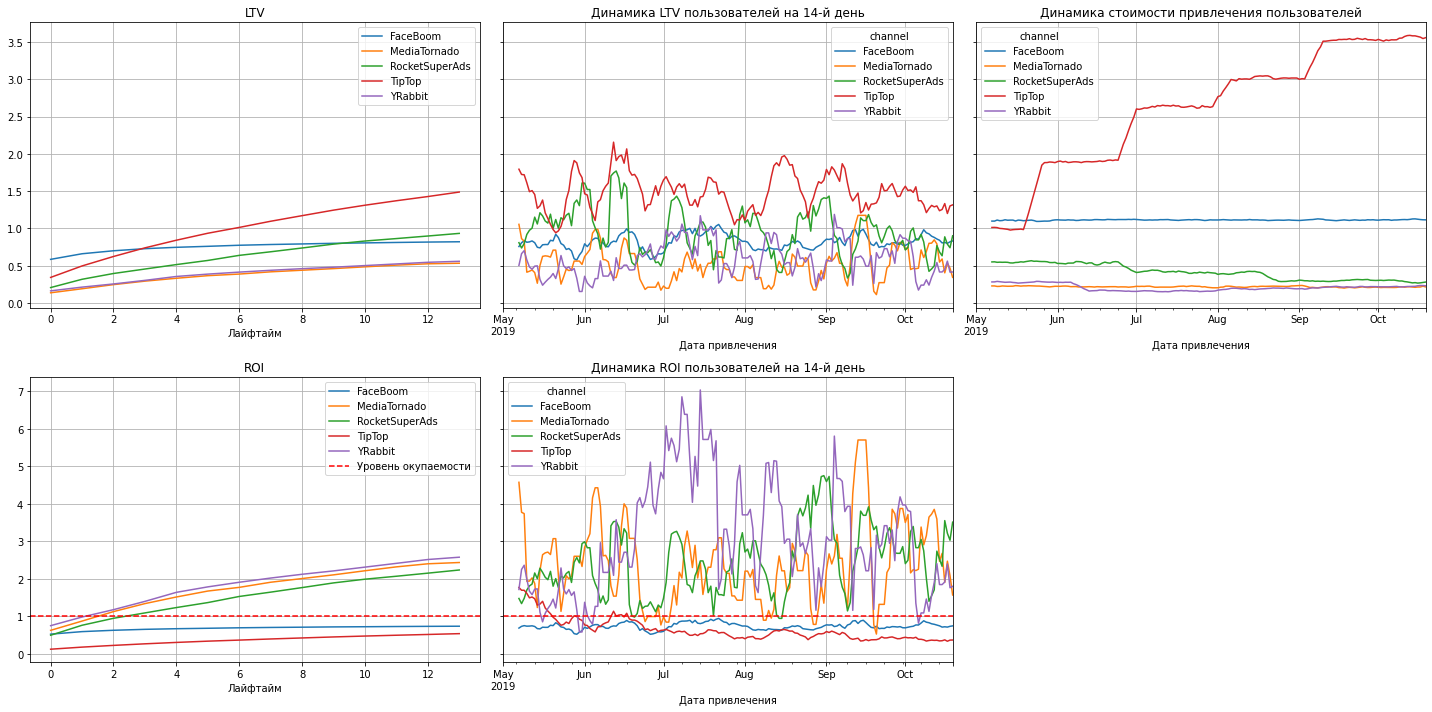

In [44]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_USA, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
)

Глядя на графики, взятые только по региону штатов видим, что все проблемы окупаемости инвестиций, больших вложений в рекламу, в большей степени связаны с регионом США:

- LTV так же стабилен
<br>

- САС, как мы уже анализировали выше, с каждым месяцем растет только в одном канале - TipTop, и как мы подразумевали, этот канал фактически полностью относится к штатам.
<br>

- ROI показывает, что в США не окупаются как раз 2 самых затратных канала по инвестициям в рекламу - TipTop и FaceBoom. Соответсвенно, делаем логичный вывод, что ещё один канал, AdNonSense, который не окупался на предыдущих графиках, относится к Европе.

### Окупаемость рекламы с разбивкой по  устройствам (CША)

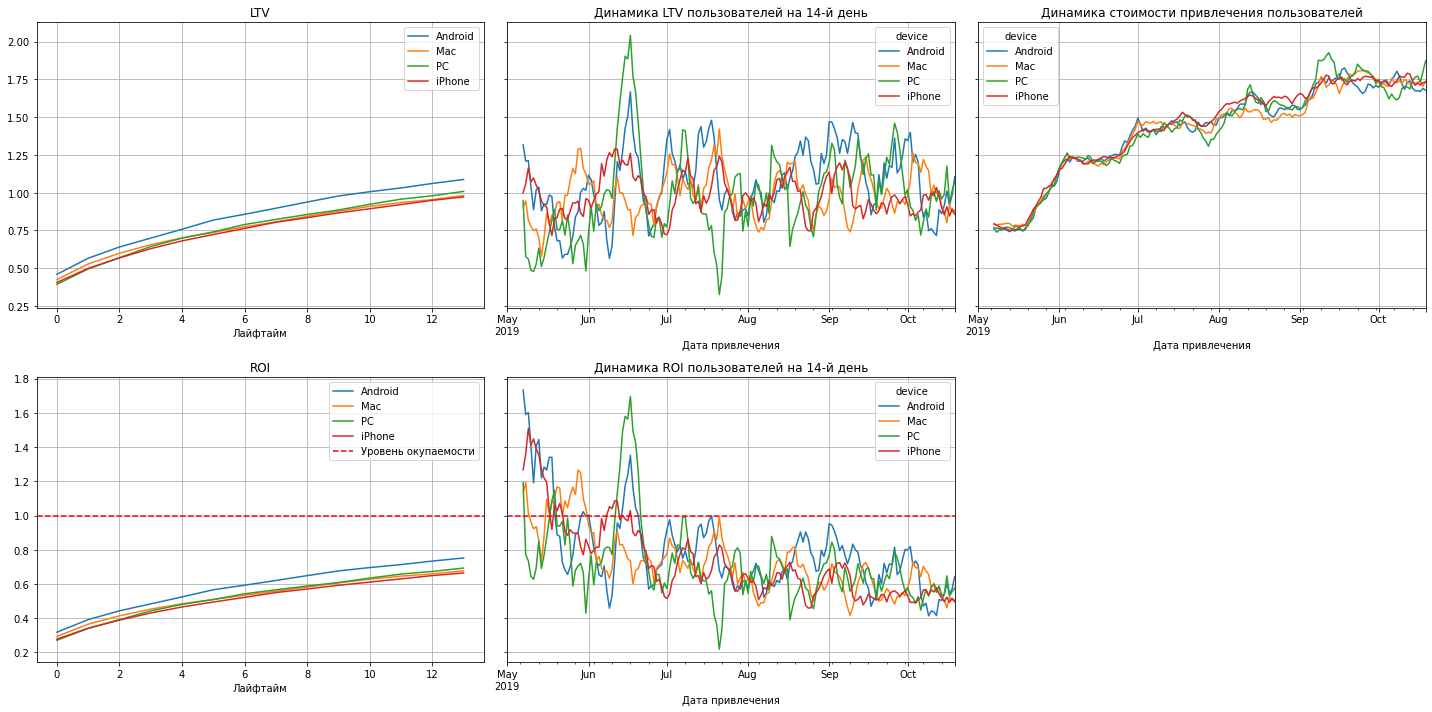

In [45]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_USA, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
)

Делаем следующие выводы по графикам для региона США:

- LTV так же стабилен 
<br>

- САС в регионе штатов, как мы мы видим, растет на всех платформах. Как только мы не учитываем САС по Европе, РС и Android становится в один ряд с Mac и IPhone в штатах.
<br>

- ROI показывает, что в штатах не окупается ни одно устройство в течении 2-х недель. В динамике видим, что все устройства в июне в США начинают испытывать спад. По предыдущим графикам, делаем вывод, что РС окупался только в Европе.

Если говорить языком бизнеса, основная проблема выглядит так - в каналах, куда вкладываются самые большие средства на рекламу, нет должной отдачи. Это каналы TipTop, FaceBoom и AdNonSense. Окупаемость у них убыточная.
<br>
Большая часть этих средств вкладывается в США контингент, которая привлекает очень много пользователей, но относительно их числа, покупателей достаточно мало, а один пользователь стоит достаточно дорого относительно других стран Европы. И из-за того, что большая часть средств идет в неэффективные каналы, окупаемость инвестиций, вцелом, у компании получается тоже убыточная, несмотря на то, что более дешевая реклама вполне себя окупает.

### Конверсия пользователей

Посчитаем и визуализируем конверсию с помощью функций `get_conversion()` и `plot_conversion()`

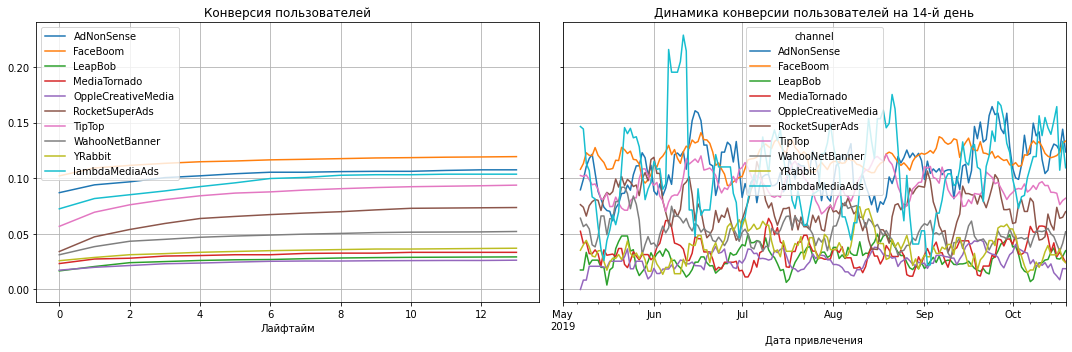

In [46]:
# конверсия с разбивкой по всем каналам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_organic, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Судя по графикам, конверсия от всех каналов достаточно хорошая.

Вызовем функции `get_retention()` и `plot_retention()`, чтобы рассчитать и отразить на графиках удержание.

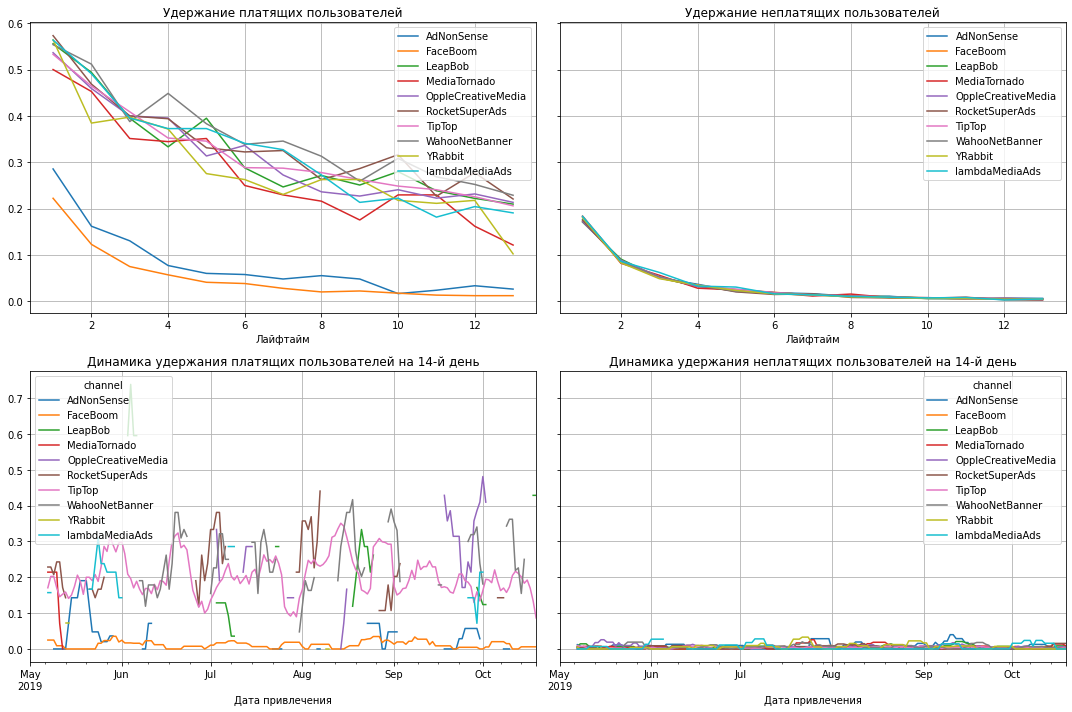

In [47]:
# удержание с разбивкой по всем каналам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_organic, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

При достаточно высокой конверсии, удержание пользователей из FaceBoom и AdNonSense гораздо ниже, чем пользователей из других каналов. А вот удержание пользователей с канала TipTop довольно на высоком уровне. Это может говорить о том, что целевая аудитория приходит в приложения из канала TipTop и других каналов, а вот на FaceBoom и AdNonSense данной аудитории гораздо меньше.

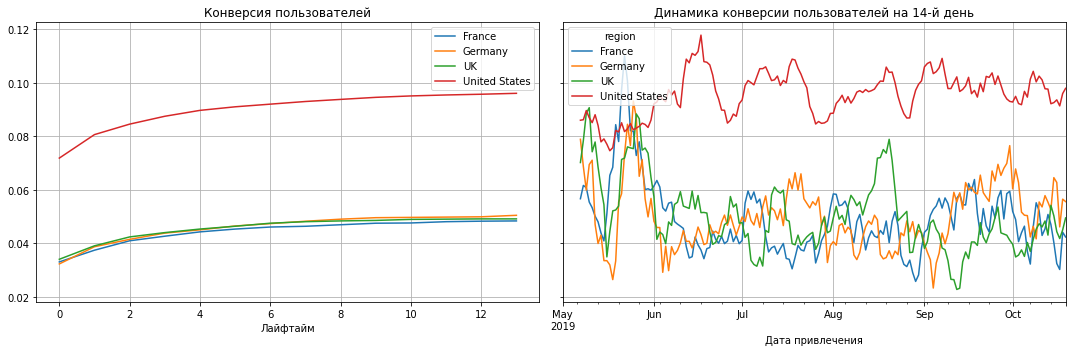

In [48]:
# конверсия с разбивкой по всем странам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_organic, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия пользователей в США ощутимо выше, чем в странах Европы. Неудивительно, ведь пользователей из США больше, чем всех пользователей Европы вместе взятых.

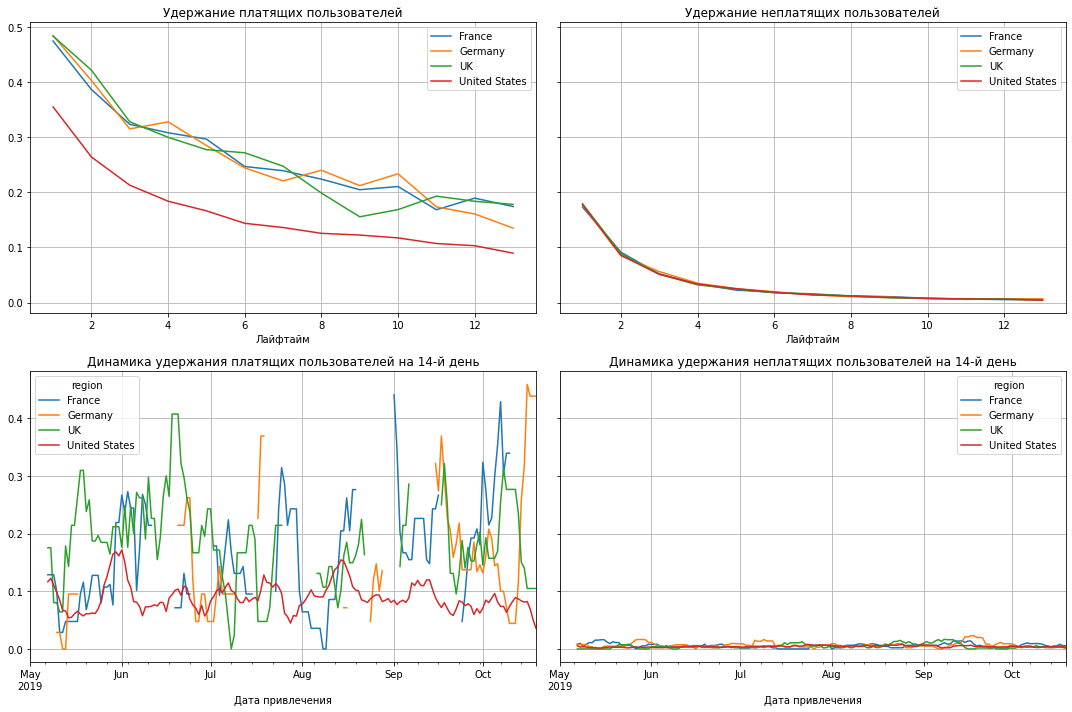

In [49]:
# удержание с разбивкой по всем странам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_organic, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Несмотря на высокую конверсию и большие траты на рекламу, в США показатель удержания платящих клиентов гораздо ниже, чем у взятых нами стран Европы.

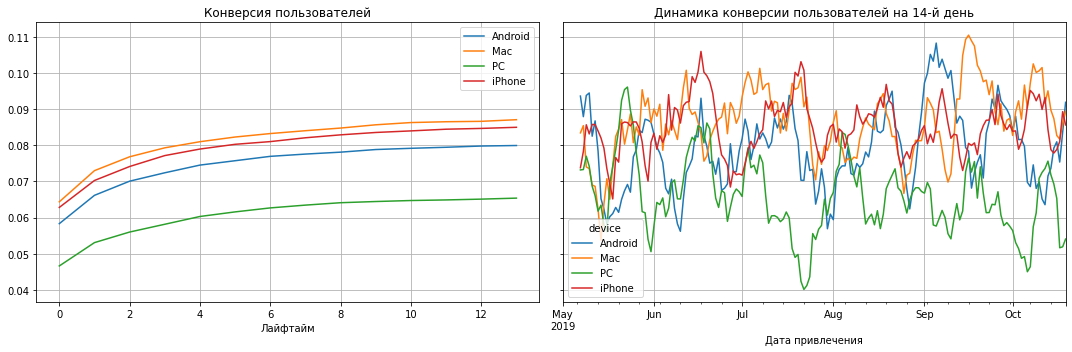

In [50]:
# конверсия с разбивкой по всем устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_organic, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Самые высокие конверсии у Mac и IPhone, самая низкая конверсия у РС.

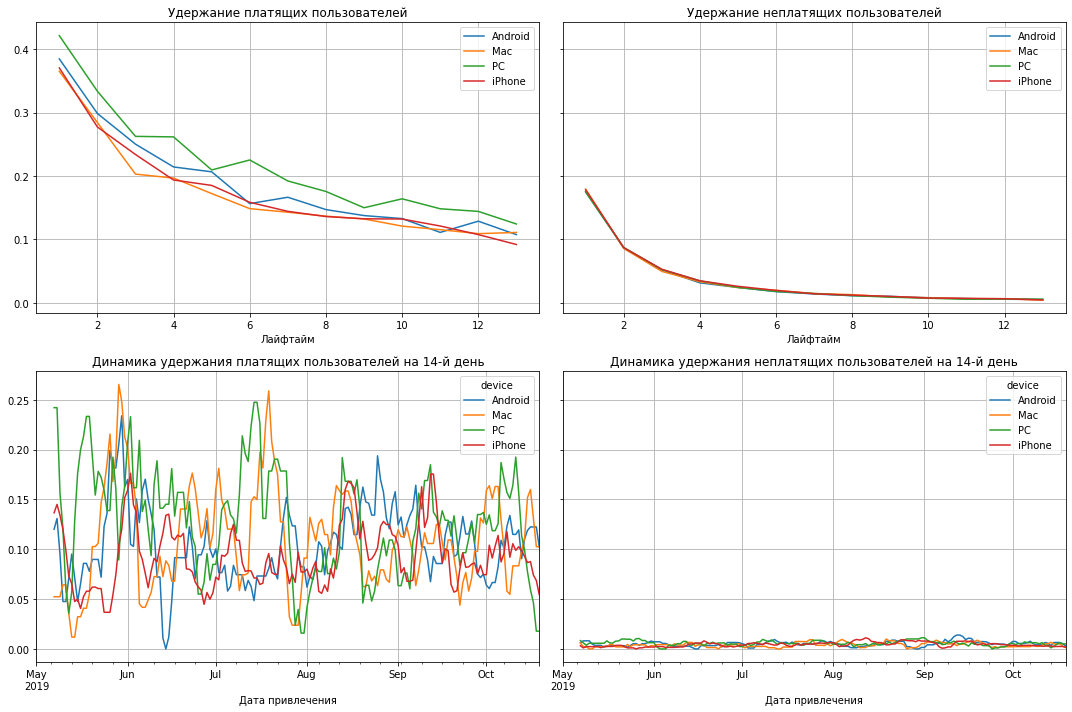

In [51]:
# удержание с разбивкой по всем устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_organic, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Несмотря на самую низкую конверсию, удержание платящих пользователей РС выше, чем у пользователей других устройств. Возможно, это связано с тем, что контингет РС-пользователей более платежеспособен.

В целом, как мы и описывали выше, основная проблема отдела рекламы, это большие инвестиции в каналы, которые не приносят в итоге достаточно прибыли, чтобы выйти на нужную окупаемость.
<br>

Если сопоставить графики, большинство этих инвестиций уходит в США. График САС для канала TipTop и США очень похож. Очевидно, что TipTop - это очень полулярный канал, поэтому на рекламу в нем тратят много средств, но, возможно, стоит вопрос в платежеспособности пользователей из данного источника. Возможно стоит обратить внимание на другие каналы трафика, реклама в которых стоит гораздо дешевле, но при этом они стабильны и в окупаемости, и в удержании, и в конверсии. И основной упор сделать стоит на пользователей в США, так как это основной контингент клиентов приложения.

## Выводы

### Причины неэффективности привлечения пользователей

Проведя анализ окупаемости рекламы, вычислив `LTV` и `ROI`, по графикам сделаны следующие выводы:

- Реклама не окупается к концу второй недели. `ROI` составляет около 80 %
<br>

- `САС` стабильно растет от месяца к месяцу, что ни есть хорошо, если нет окупаемости. Паралельно `ROI` падает с каждым месяцем.
<br>

- `LTV` достаточно стабилен, хотя на графике динамики он периодически скачет, на что может влиять сезонный фактор.
<br>

- `ROI`, как уже писали выше, неумолимо падает к концу июня, а дальше все ниже.

Одна из причин неэффективности привлечения в том, что, в каналы трафика TipTop, FaceBoom и AdNonSense вкладываются достаточно большие средства, но они не приносят нужной окупаемости. Причины могут быть разные: это нецелевая аудитория в данных каналах, либо маленькая платежеспособность аудитории канала, но если на протяжении определенного времени это не приносит результатов, то очевидно, что надо что-то менять.

Если мы рассмотрим динамику `ROI` по регионам, то увидим, что ещё в начале мая окупаемость была и у пользователей в США, но к началу июня она начала неумолимо падать, тогда как `САС` в это время начал расти. Причин может быть так же много, почему приложение стало менее привлекательным: неудачное обновление приложения, какой-то технический сбой, переманивание к конкурентам с аналогичным новым продуктом и т.д. Такие варианты тоже стоит рассмотреть.

Зависимость от устройств, конечно, относительна и вторична. В основном то, что `САС` растет на устройствах Mac и IPhone, а `ROI` падает связано с тем, что это основные устойства для пользователей США. Какие-то громкие выводы отталкиваясь от устройств делать не будем.

### Рекомендации для отдела маркетинга для повышения эффективности

Какие рекомендации можно дать для отдела маркетинга для повышения эффективности:

1. Безусловно, надо пересмотреть политику маркетинга в отношении пользователей США и каналов трафика, которые там популярны, так как пользователи США - это основной контингент приложения, самые платящие пользователи, но при этом окупаемость рекламы в данной стране самая низкая. Так же стоит разобраться, почему с конца мая-начала июня окупаемость инвестиций в США начала резко падать. Что могло произойти в этот промежуток?! И, возможно, часть средств стоит распределить на усиление привлечения пользователей в Европе, так как, вцелом, Европейские страны показывают неплохие результаты по всем показателям.
<br>

2. Касаемо устройств, стоит обратить внимание на пользователей Mac и IPhone, `САС` которых прилично выше и дальше растет относительно других устройств, а `ROI` страдает. Может стоит подготовить специальное предложение для продуктов фирмы Apple, которое повысит ценность приложения в глазах пользователей.
<br>

3. Стоит пересмотреть огромные траты на маркетинг в отношении каналов TipTop (в особенности к этому каналу), FaceBoom и AdNonSense. Каналы не окупаются. Причин может быть много. Популярность канала не говорит о том, что там находится целевая аудитория приложения, а если она там и есть, насколько эта аудитория платежеспособна?! Возможно большую часть из выделенных средств на тот же TipTop стоит перенаправить в другие каналы, у которых все показатели достаточно хорошие: `САС`намного ниже, `ROI` отличный, конверсия на уровне (лучше только у трех убыточных по окупаемости рекламы каналов), удержание платящих пользователей почти на уровне того же TipTop, а некоторые даже выше. Есть рекомендация обратить внимание на каналы трафика с подобными характеристиками, например, lambdaMediaAds и RocketSuperAds. 
